In [ ]:
# This stuff might be useful

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay

# Data Review <a id = "1"></a>

In [ ]:
url = 'https://raw.githubusercontent.com/BoBernhardsson/SomeData/main/Dataset.csv'
data = pd.read_csv(url)
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [ ]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [ ]:
# Dataset Values(Max, min, std..)
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


In [ ]:
# Data Correlation: Relationship between columns
data.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


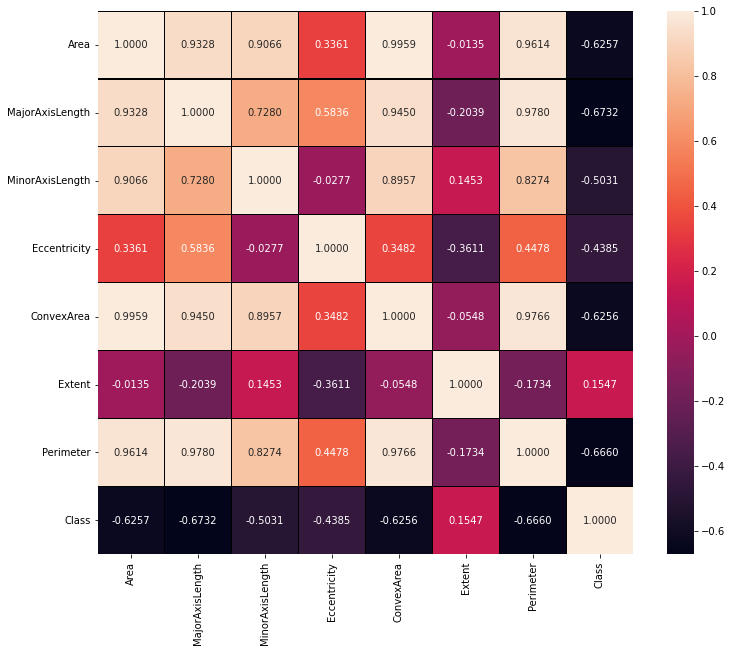

In [ ]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

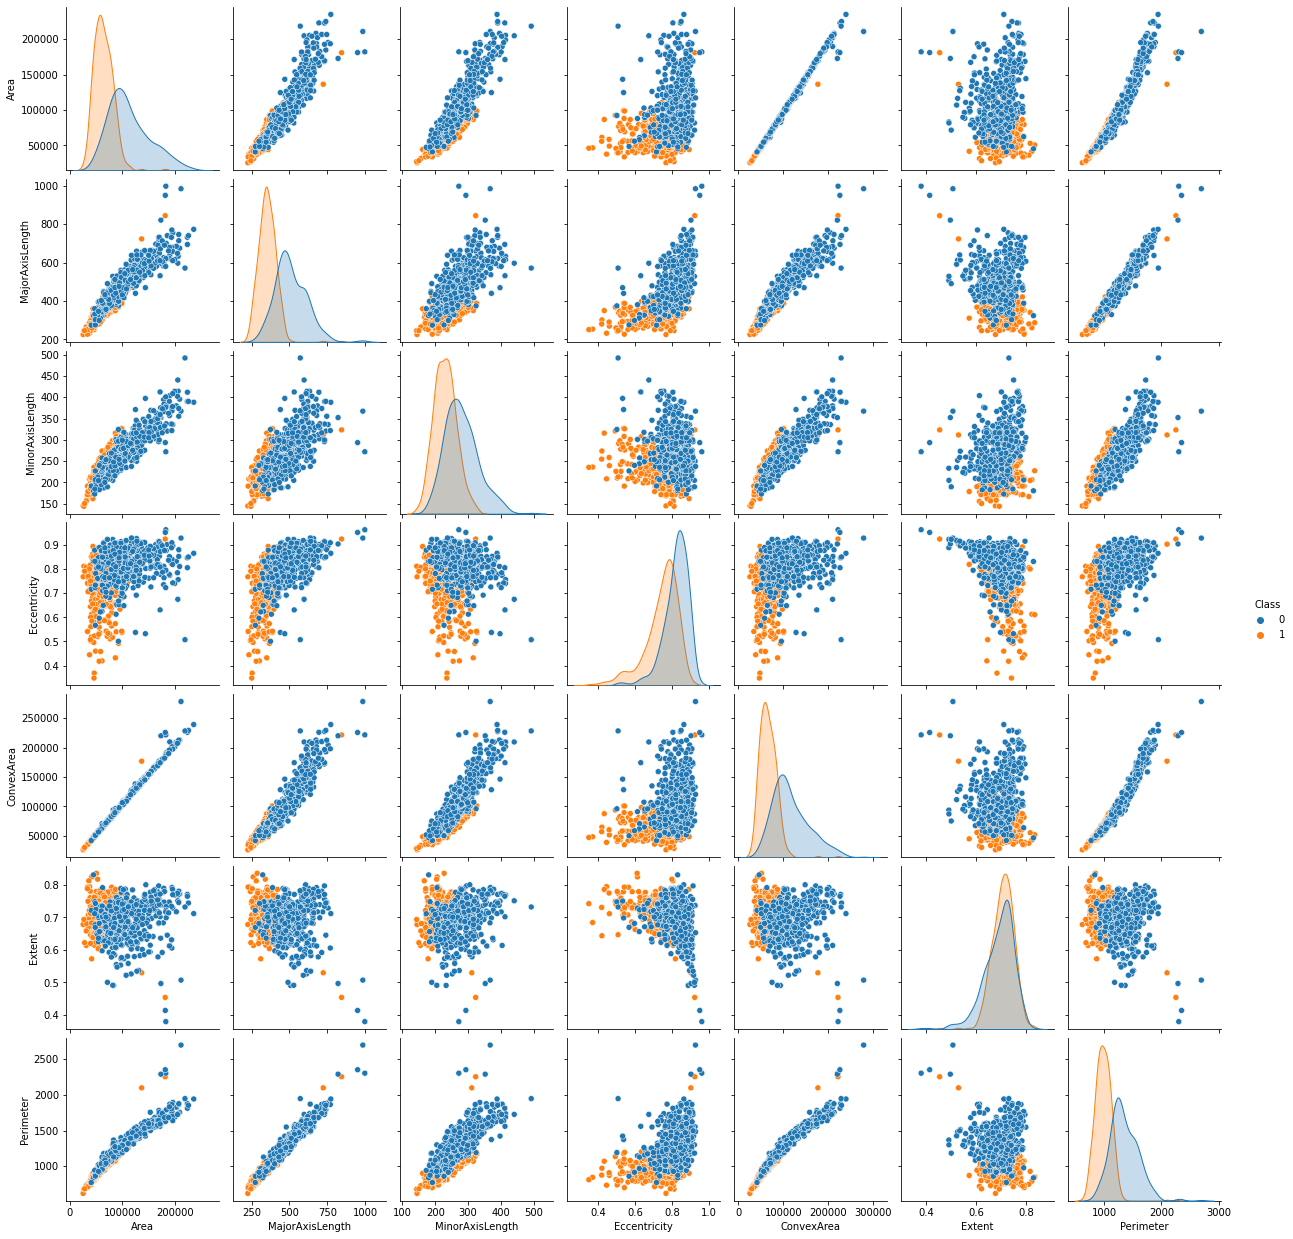

In [ ]:
# Visualization of correlation results with seaborn library pairplot
# Can take a minute to generate
sns.pairplot(data, hue = "Class")

In [ ]:
# Dataset columns names
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

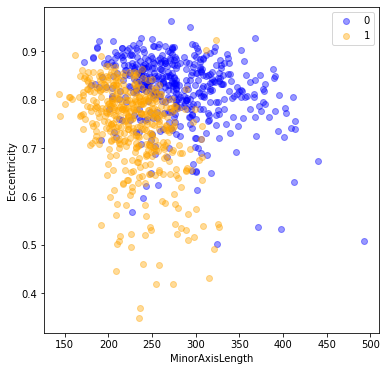

In [ ]:
# Some More Visualisation, to see class overlap better
Class1 = data[data.Class == 1]
Class0 = data[data.Class == 0]

plt.figure(figsize = (6,6))
plt.scatter(Class0.MinorAxisLength, Class0.Eccentricity, color = "blue", label = "0", alpha=0.4)
plt.scatter(Class1.MinorAxisLength, Class1.Eccentricity, color = "orange", label = "1",  alpha=0.4)
plt.xlabel("MinorAxisLength")
plt.ylabel("Eccentricity")
plt.legend()
plt.show()

In [ ]:
# Transform data to arrays of values
x_data = data.iloc[:, 0:-1].values    # all features
y_data = data.iloc[:, -1].values      # the targets

In [ ]:
# The following data treatment should be improved !
# But note: At most 3 features should be used in the KNN

chosenfeatures = [2,3,5];   # picks out columns 3,4 and 6, remember python's numbering of columns!
x_chosen = x_data[:,chosenfeatures]
x_train, x_test, y_train, y_test = train_test_split(x_chosen, y_data, test_size=0.3, random_state = 1)

x_chosen.shape

(900, 3)

# Train KNN models
 <a id = "1"></a>

In [ ]:
from sklearn.model_selection import cross_val_score
for nr in range(1,30,2):
  model = KNeighborsClassifier(n_neighbors = nr) 
  scores = cross_val_score(model, x_chosen, y_data, cv=10)
  print("%2.0f:  %0.3f accuracy" % (nr,scores.mean()))

 1:  0.667 accuracy
 3:  0.681 accuracy
 5:  0.663 accuracy
 7:  0.669 accuracy
 9:  0.692 accuracy
11:  0.698 accuracy
13:  0.713 accuracy
15:  0.711 accuracy
17:  0.698 accuracy
19:  0.693 accuracy
21:  0.702 accuracy
23:  0.689 accuracy
25:  0.700 accuracy
27:  0.691 accuracy
29:  0.691 accuracy


In [ ]:
KNNbad = KNeighborsClassifier(n_neighbors = 13)
KNNbad.fit(x_train,y_train);

## My solution is from here and below (more comments in separate document)!
KNNbad.score(x_test,y_test) # this we want to beat

0.7

In [ ]:
from sklearn.pipeline import make_pipeline

# ideas for features: feature 3 in combination with some of the others (0, 1, 2, 5, 6)
chosenfeatures = [3, 2, 6];    #3 together with 2 and 6 are good
x_chosen = x_data[:,chosenfeatures]
x_train, x_test, y_train, y_test = train_test_split(x_chosen, y_data, test_size=0.3, random_state = 1)


pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 13))
pipe.fit(x_train, y_train)  
scores = cross_val_score(pipe, x_chosen, y_data, cv=10)
print("%2.0f:  %0.3f accuracy" % (nr,scores.mean()))

29:  0.857 accuracy


In [ ]:
pipe.score(x_test, y_test)  

0.8851851851851852

# Picking features by asking a RandomForest Classifier for advice


In [ ]:
# Complete this code and use it to chose 1-3 informative features?
RF = RandomForestClassifier(n_estimators=500)
RF.fit(x_data,y_data);
importances = RF.feature_importances_

for feature in range(len(data.columns[:-1])):
  print(f"Feature: {data.columns[feature]} Importance: {importances[feature]} ")


Feature: Area Importance: 0.13946191200430866 
Feature: MajorAxisLength Importance: 0.2520041693780591 
Feature: MinorAxisLength Importance: 0.07420458895480316 
Feature: Eccentricity Importance: 0.09048628402165942 
Feature: ConvexArea Importance: 0.15671448811916303 
Feature: Extent Importance: 0.06274624755822428 
Feature: Perimeter Importance: 0.22438230996378253 


# How to reduce false positives 

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(x_train,y_train)
y_predicted = KNN.predict(x_test)
print("The accuracy of KNN is : ", accuracy_score(y_test, y_predicted.round())*100, "%")
confusion_matrix(y_test, y_predicted)

The accuracy of KNN is :  81.11111111111111 %


array([[110,  30],
       [ 21, 109]])

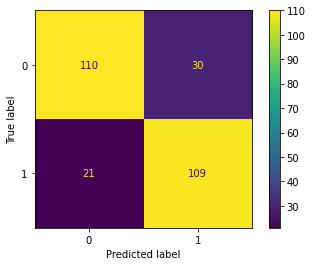

In [ ]:
cm = confusion_matrix(y_test,y_predicted, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot();

In [ ]:
probs = KNN.predict_proba(x_test)[:,1]

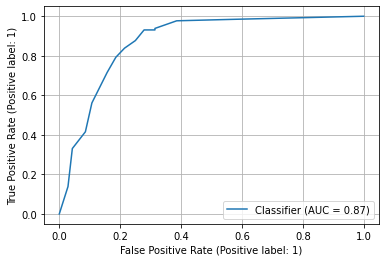

In [ ]:
RocCurveDisplay.from_predictions(y_test,probs)
plt.grid()

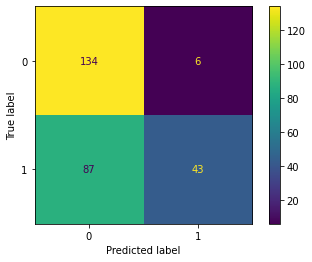

In [ ]:
cm = confusion_matrix(y_test,(probs>0.9).astype(int), labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
disp.plot();

In [ ]:
FPR = 6/(6+134)
TPR = 43/(43+87)
print(FPR, TPR)

0.04285714285714286 0.33076923076923076
